# Energy Consumption Prediction for Smart Homes
Goal: Build a regression model to predict energy consumption of home appliances based on temperature, humidity, and other environmental factors. Helps in designing energy-efficient smart home automation.

In [167]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, f_classif

# Intermediate Phase

In [4]:
df=pd.read_csv("energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [5]:
print("The shape of the dataset:",df.shape)

The shape of the dataset: (19735, 29)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
print("The columns in the dataset:",df.columns)

The columns in the dataset: Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [8]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [9]:
duplicates = df.isnull().sum()
print("Duplicates in the dataset:")
print(duplicates)

Duplicates in the dataset:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


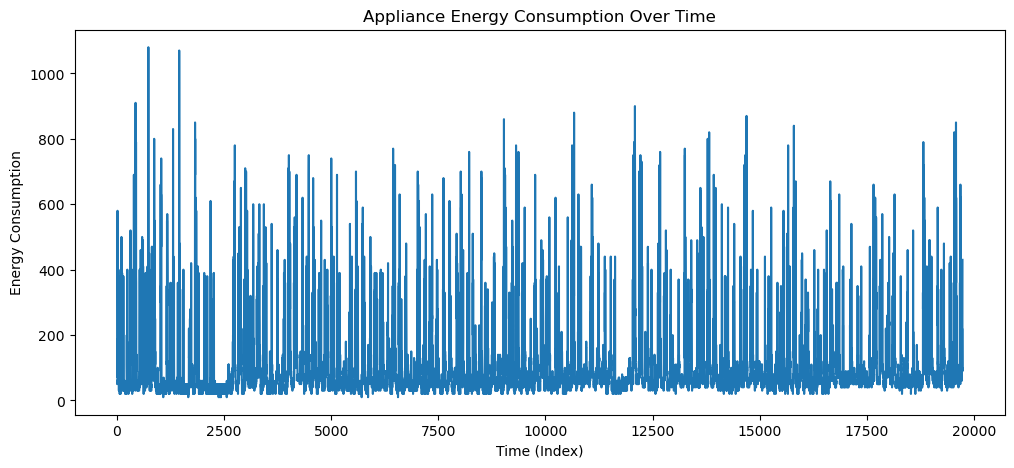

In [10]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df.index, y=df["Appliances"])
plt.title("Appliance Energy Consumption Over Time")
plt.xlabel("Time (Index)")
plt.ylabel("Energy Consumption")
plt.show()

The energy consumption of appliances shows high variability over time with frequent spikes, indicating irregular usage patterns, while a consistent baseline suggests continuous or periodic usage of some appliances. There may also be cyclical trends influencing the fluctuations, which could be analyzed further.

In [11]:
# Drop unnecessary column
df.drop(columns=['date'], inplace=True)

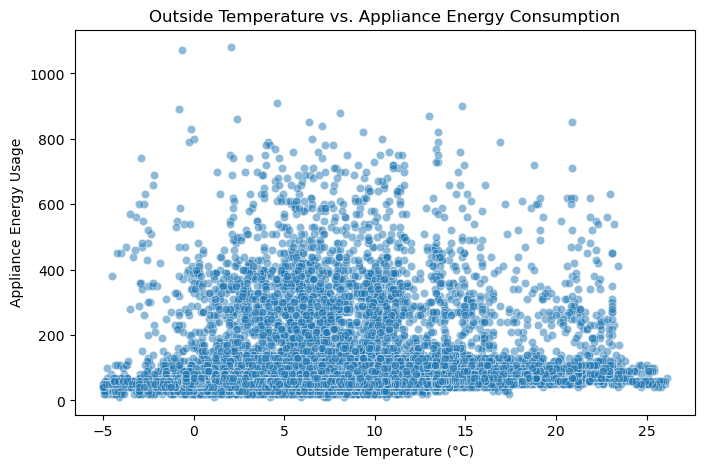

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["T_out"], y=df["Appliances"], alpha=0.5)
plt.title("Outside Temperature vs. Appliance Energy Consumption")
plt.xlabel("Outside Temperature (°C)")
plt.ylabel("Appliance Energy Usage")
plt.show()

The scatter plot shows that appliance energy usage is widely spread across different outside temperatures, with no strong correlation, though higher consumption is observed at various temperature ranges, possibly due to heating or cooling needs.

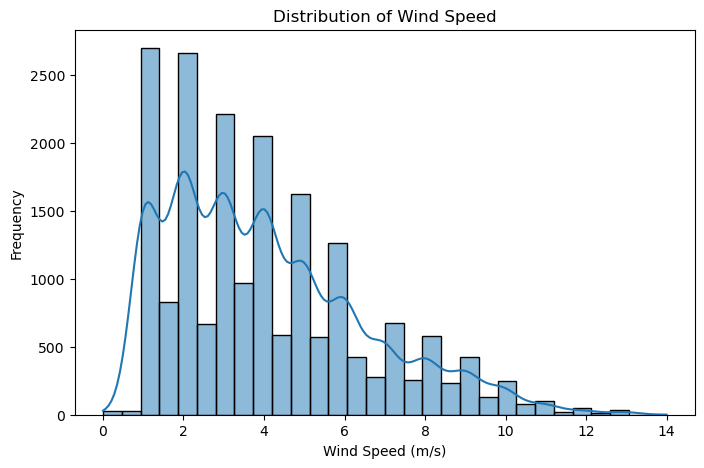

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Windspeed"], bins=30, kde=True)
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

The histogram shows that wind speed is mostly low, with higher frequencies in the range of 0 to 5 m/s, and gradually decreases as wind speed increases.

In [14]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [15]:
print("Skewness values for each column:")
df.skew()

Skewness values for each column:


Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534302
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239975
rv1            0.004945
rv2            0.004945
dtype: float64

The ideal skewness value should be close to 0 for a normal distribution. However, in practical scenarios:
* -0.5 to 0.5 → Fairly Symmetrical
* -1 to -0.5 or 0.5 to 1 → Moderately Skewed
* Less than -1 or Greater than 1 → Highly Skewed

Highly Skewed (Needs Transformation)
* Appliances (3.386367) → Strongly right-skewed
* lights (2.195155) → Highly right-skewed
* RH_5 (1.866820) → Highly right-skewed
* Windspeed (0.859982) → Moderately right-skewed
  
Moderately Skewed (Mild Transformation May Help)
* T2 (0.889658) → Right-skewed
* T_out (0.534302) → Right-skewed
* RH_9 (0.368937) → Slight right skew
* T9 (0.382711) → Slight right skew
  
Fairly Symmetrical (No Transformation Needed)
* Tdewpoint (0.239975), RH_7 (0.242141), T7 (0.254722) → Close to normal distribution

Moderately Left-Skewed
* RH_out (-0.922997) → Moderately left-skewed
* Press_mm_hg (-0.420442) → Slight left skew
* T8 (-0.256151) → Slight left skew

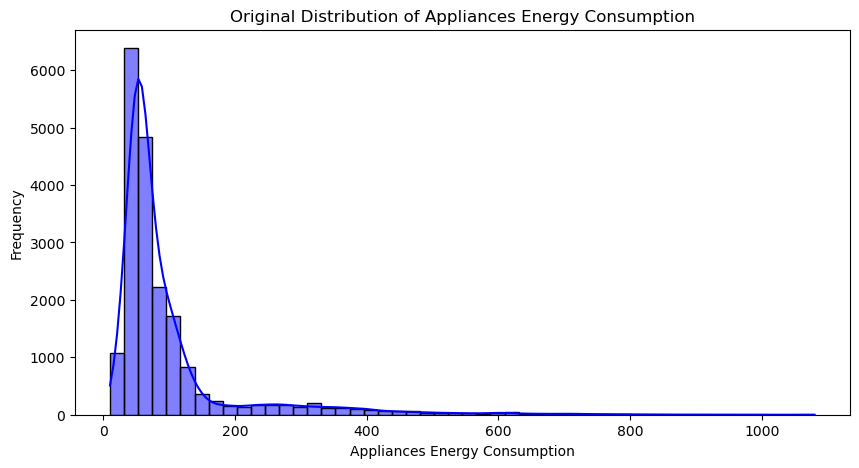

In [18]:
# Plot the original distribution of Appliances
plt.figure(figsize=(10, 5))
sns.histplot(df["Appliances"], bins=50, kde=True, color='blue')
plt.title("Original Distribution of Appliances Energy Consumption")
plt.xlabel("Appliances Energy Consumption")
plt.ylabel("Frequency")
plt.show()

The histogram shows that most appliances consume low energy, with frequency decreasing as energy consumption increases.

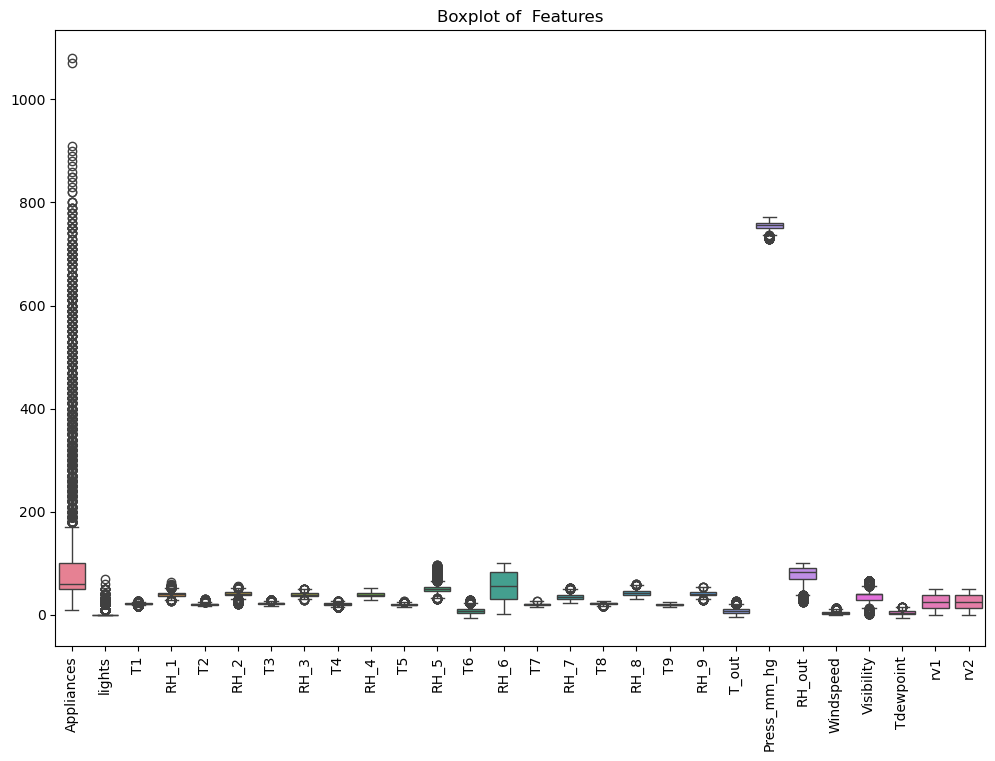

In [19]:
# Boxplot to view outliers
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

Columns That Should Be Transformed (Highly Skewed)
1. Right-Skewed
* Appliances (3.386367)
* lights (2.195155)
* RH_5 (1.866820)
* Windspeed (0.859982)
* T2 (0.889658) 

2. Left-Skewed 
* RH_out (-0.922997) 

In [21]:
# Apply Log Transformation for columns - "Appliances", "lights", "RH_5", "Windspeed", "T2"
cols_to_log = ["Appliances", "lights", "RH_5", "Windspeed", "T2"]
df[cols_to_log] = np.log1p(df[cols_to_log])

In [22]:
# Apply IQR transformation method for column - "RH_out"
Q1 = df["RH_out"].quantile(0.25)
Q3 = df["RH_out"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["RH_out"] >= lower_bound) & (df["RH_out"] <= upper_bound)]

In [23]:
# Review skewness
df.skew()

Appliances     1.190418
lights         1.392110
T1             0.117512
RH_1           0.528765
T2             0.580099
RH_2          -0.069142
T3             0.467066
RH_3           0.468824
T4             0.185610
RH_4           0.449892
T5             0.571855
RH_5           1.261486
T6             0.555091
RH_6          -0.253443
T7             0.273993
RH_7           0.234134
T8            -0.242122
RH_8           0.303955
T9             0.401014
RH_9           0.357046
T_out          0.459814
Press_mm_hg   -0.418716
RH_out        -0.774234
Windspeed     -0.035791
Visibility     0.440530
Tdewpoint      0.235035
rv1            0.004173
rv2            0.004173
dtype: float64

In [24]:
# Handle skewness for the 2nd time 

In [25]:
cols_to_log = ["Appliances", "lights"]
df[cols_to_log] = np.log1p(df[cols_to_log])

In [26]:
Q1 = df["RH_out"].quantile(0.25)
Q3 = df["RH_out"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["RH_out"] >= lower_bound) & (df["RH_out"] <= upper_bound)]

In [27]:
df.skew()

Appliances     0.805079
lights         1.318499
T1             0.120448
RH_1           0.530693
T2             0.580864
RH_2          -0.042579
T3             0.470631
RH_3           0.466542
T4             0.190053
RH_4           0.447610
T5             0.575930
RH_5           1.269635
T6             0.552760
RH_6          -0.255813
T7             0.277709
RH_7           0.232455
T8            -0.238394
RH_8           0.301088
T9             0.404629
RH_9           0.353665
T_out          0.455323
Press_mm_hg   -0.417631
RH_out        -0.753350
Windspeed     -0.033386
Visibility     0.440177
Tdewpoint      0.233594
rv1            0.004036
rv2            0.004036
dtype: float64

In [28]:
# Handle skewness for the 3rd time 

In [29]:
cols_to_log = ["Appliances", "lights","RH_5"]
df[cols_to_log] = np.log1p(df[cols_to_log])

In [30]:
Q1 = df["RH_out"].quantile(0.25)
Q3 = df["RH_out"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["RH_out"] >= lower_bound) & (df["RH_out"] <= upper_bound)]

In [31]:
# Review skewness
df.skew()

Appliances     0.651369
lights         1.301933
T1             0.120448
RH_1           0.530693
T2             0.580864
RH_2          -0.042579
T3             0.470631
RH_3           0.466542
T4             0.190053
RH_4           0.447610
T5             0.575930
RH_5           1.151602
T6             0.552760
RH_6          -0.255813
T7             0.277709
RH_7           0.232455
T8            -0.238394
RH_8           0.301088
T9             0.404629
RH_9           0.353665
T_out          0.455323
Press_mm_hg   -0.417631
RH_out        -0.753350
Windspeed     -0.033386
Visibility     0.440177
Tdewpoint      0.233594
rv1            0.004036
rv2            0.004036
dtype: float64

Applying outlier removal multiple times (more than necessary) can lead to data inconsistencies and information loss. The dataset is now well-balanced with minimal skewness

In [33]:
df.shape

(19441, 28)

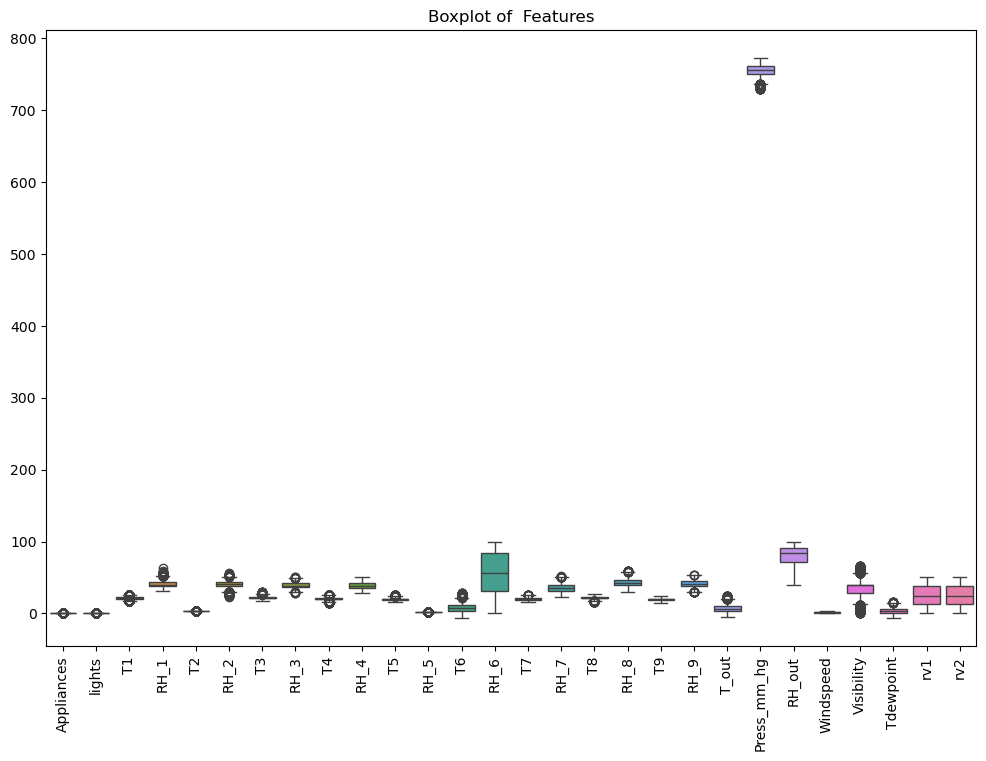

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

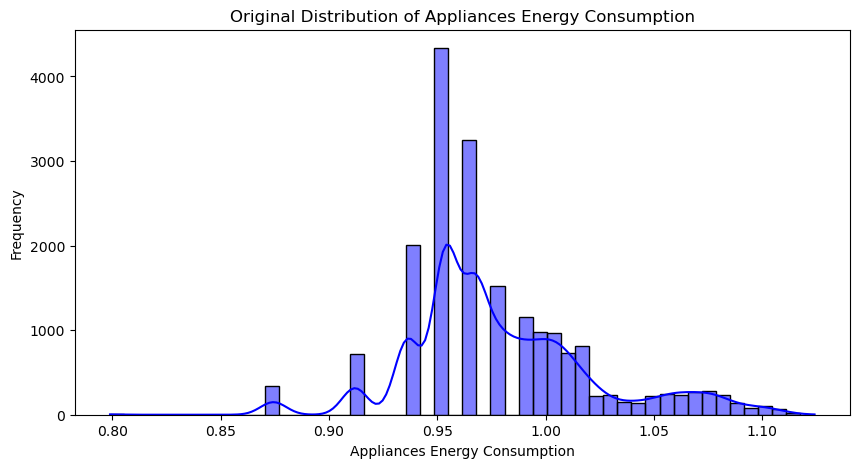

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Appliances"], bins=50, kde=True, color='blue')
plt.title("Original Distribution of Appliances Energy Consumption")
plt.xlabel("Appliances Energy Consumption")
plt.ylabel("Frequency")
plt.show()

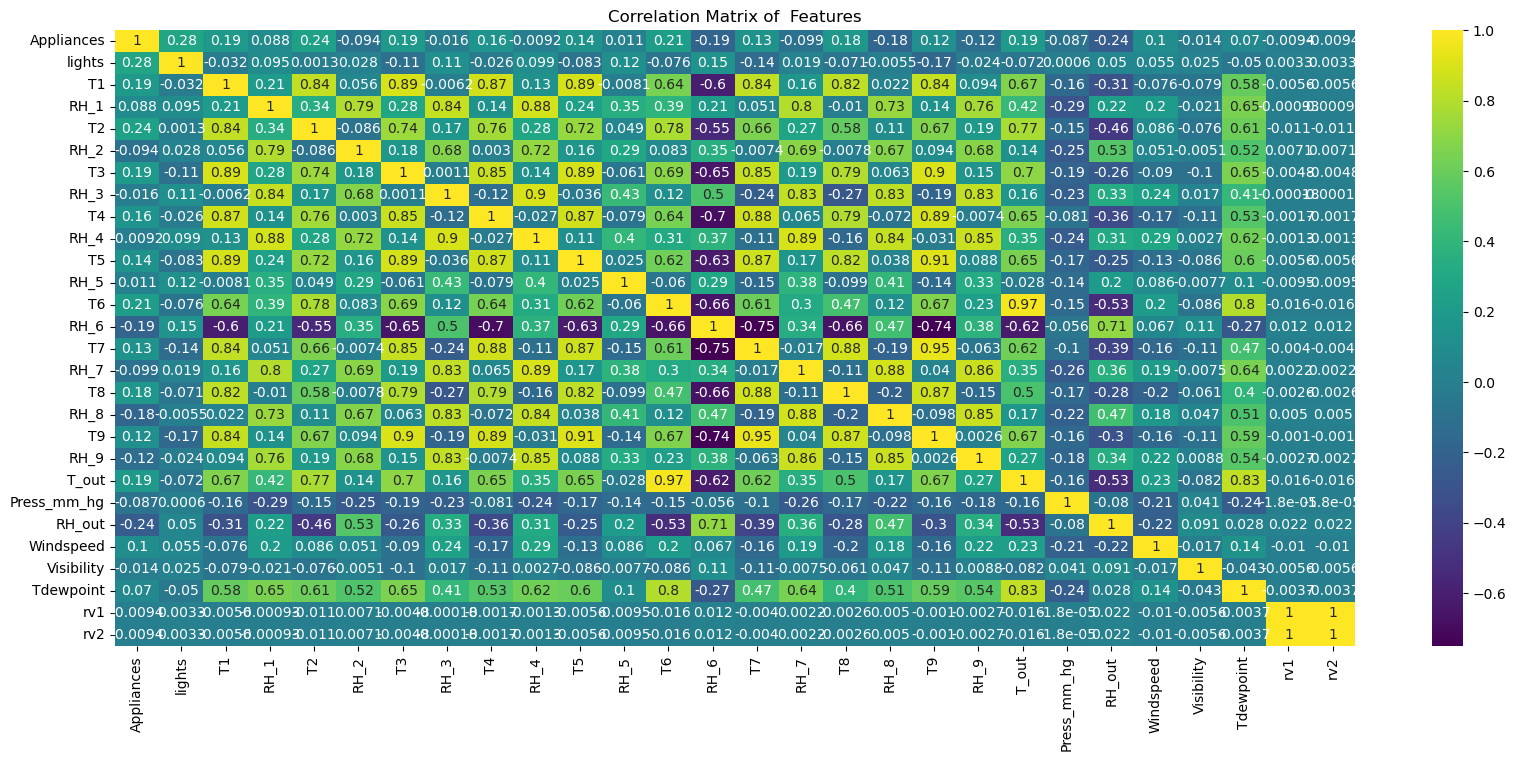

In [36]:
# Correlation Matrix 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

# PHASE 1

In [38]:
# Separate features and target variable
X = df.drop(columns=['Appliances'])
y = df['Appliances']

In [39]:
X,y

(         lights         T1       RH_1        T2       RH_2         T3  \
 0      0.912001  19.890000  47.596667  3.005683  44.790000  19.790000   
 1      0.912001  19.890000  46.693333  3.005683  44.722500  19.790000   
 2      0.912001  19.890000  46.300000  3.005683  44.626667  19.790000   
 3      0.936268  19.890000  46.066667  3.005683  44.590000  19.790000   
 4      0.936268  19.890000  46.333333  3.005683  44.530000  19.790000   
 ...         ...        ...        ...       ...        ...        ...   
 19730  0.000000  25.566667  46.560000  3.291754  42.025714  27.200000   
 19731  0.000000  25.500000  46.500000  3.286684  42.080000  27.133333   
 19732  0.798928  25.500000  46.596667  3.281985  42.768571  27.050000   
 19733  0.798928  25.500000  46.990000  3.273894  43.036000  26.890000   
 19734  0.798928  25.500000  46.600000  3.268210  42.971429  26.823333   
 
             RH_3         T4       RH_4         T5  ...         T9     RH_9  \
 0      44.730000  19.000000  4

ANOVA F-test scores plot helps in selecting the most important features for the prediction model.

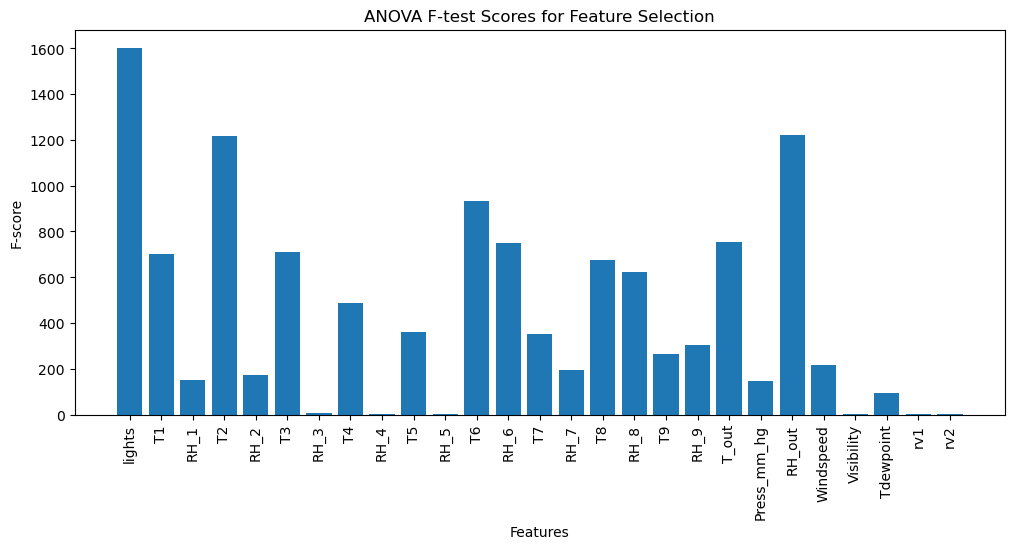

In [41]:
# Compute ANOVA F-scores
f_scores, _ = f_regression(X, y)
# Plot feature importance
plt.figure(figsize=(12, 5))
plt.bar(range(len(X.columns)), f_scores, tick_label=X.columns)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("F-score")
plt.title("ANOVA F-test Scores for Feature Selection")
plt.show()

With the help of above bar graph, 6 features are removed, making k value 21

In [144]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [146]:
# Apply ANOVA F-test on X_scaled
select_k = SelectKBest(score_func=f_regression, k=21)  # Selecting top 10 features
X_selected = select_k.fit_transform(X_scaled, y)
# Get selected feature names and scores
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

In [148]:
# Store results in a DataFrame
feature_importance = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})
feature_importance = feature_importance.sort_values(by='Score', ascending=False)
# Print the significant features
print("Top 21 Significant Features Affecting Energy consumption:")
print(feature_importance)

Top 21 Significant Features Affecting Energy consumption:
        Feature        Score
0        lights  1602.021869
18       RH_out  1220.128577
3            T2  1219.154789
8            T6   931.363466
16        T_out   752.922446
9          RH_6   747.631527
5            T3   708.676255
1            T1   702.639784
12           T8   675.894884
13         RH_8   624.686289
6            T4   485.848796
7            T5   361.154899
10           T7   351.181637
15         RH_9   306.214943
14           T9   266.433290
19    Windspeed   216.088432
11         RH_7   193.402350
4          RH_2   173.606814
2          RH_1   152.646239
17  Press_mm_hg   146.874706
20    Tdewpoint    96.147645


# PHASE 2

In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor

In [153]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='linear')
}

In [159]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({"Model": name, "R2 Score": r2, "MSE": mse, "MAE": mae})

# Convert results to DataFrame and sort by R2 Score
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)

In [161]:
# Print model performance
print("Model Performance Comparison:")
print(results_df)

# Identify the best performing model
best_model = results_df.iloc[0]
print("\nBest Performing Model:")
print(best_model)

Model Performance Comparison:
                         Model  R2 Score       MSE       MAE
2      Random Forest Regressor  0.691910  0.000576  0.016238
1      Decision Tree Regressor  0.425360  0.001075  0.020678
3  Gradient Boosting Regressor  0.399331  0.001124  0.023909
0            Linear Regression  0.283814  0.001340  0.026332
4     Support Vector Regressor  0.158352  0.001575  0.031155

Best Performing Model:
Model       Random Forest Regressor
R2 Score                    0.69191
MSE                        0.000576
MAE                        0.016238
Name: 2, dtype: object


Based on the model performance comparison, the Random Forest Regressor is the best-performing model for predicting energy consumption in smart homes. It achieved:
* Highest R² Score: 0.6919, indicating that it explains about 69.19% of the variance in the target variable.
* Lowest Mean Squared Error (MSE): 0.000576, meaning it has the least prediction error compared to other models.
* Lowest Mean Absolute Error (MAE): 0.016238, showing that its predictions are closer to actual values on average.
Other models like Decision Tree, Gradient Boosting, Linear Regression, and Support Vector Regression performed worse, with significantly lower R² scores and higher errors.
Thus, Random Forest Regressor is the most reliable model for this dataset and should be considered for deployment or further optimization. 

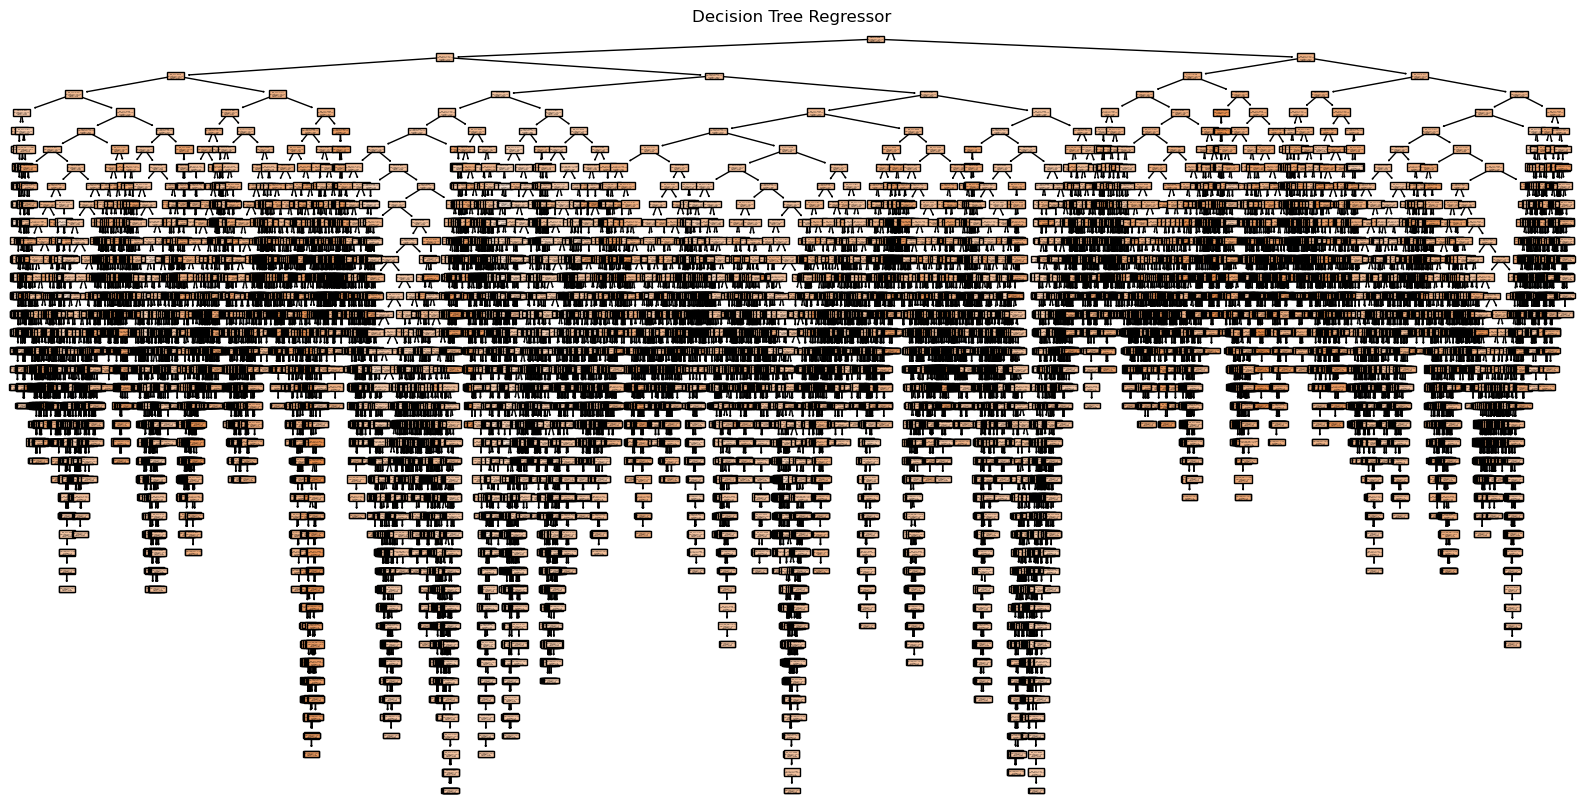

In [171]:
# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=df.drop(columns=['Appliances']).columns)
plt.title("Decision Tree Regressor")
plt.show()